# Digit Recognizer

In [ ]:
!kaggle competitions download -c digit-recognizer

from zipfile import ZipFile
import os, shutil
try:
    os.mkdir('data')
except:
    continue
path='C:/Users/mehmu/Desktop/PyProjects/Projects/Unlocked/KaggleComp/DigitRecognizer/'
for i in os.listdir(path):
    if '.zip' in i:
        shutil.move(path+i,path+'/data/')
        print(i)
        with ZipFile(i, 'r') as zipObj:
            zipObj.extractall()
        os.remove(i)



In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')


df=pd.read_csv('data/train.csv')

df


In [ ]:
X=df.drop('label',axis=1)
Y=df.label

In [ ]:
Y=pd.get_dummies(Y,prefix='Num')

In [ ]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X=X/255

X=X.values.reshape(-1,28,28)

In [ ]:
X.shape

(42000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
validation_data=X_val,y_val

# ANN

İlk önce kendimize CNN kullanmadan bir mimari tasarlıyoruz.

Buradaki ayarlar hypertuning ile karşılaşırılabilir. Ben sadece iki çeşit denedim.

In [9]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape = (28,28,1)),                             
keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax')])


model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

model.fit(X_train,y_train, epochs=20, validation_data=(validation_data), callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 0.2605 - auc: 0.9941 - val_loss: 0.1421 - val_auc: 0.9968
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1219 - auc: 0.9975 - val_loss: 0.1790 - val_auc: 0.9950
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0892 - auc: 0.9982 - val_loss: 0.1489 - val_auc: 0.9955
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0729 - auc: 0.9987 - val_loss: 0.1218 - val_auc: 0.9966
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0580 - auc: 0.9991 - val_loss: 0.1514 - val_auc: 0.9953
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0498 - auc: 0.9993 - val_loss: 0.1498 - val_auc: 0.9955
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0414 - auc: 0.9993 - val_loss: 0.1295 - val_auc: 0.9959


In [10]:
loss, accuracy = model.evaluate(X_val,y_val)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

263/263 [==============================] - 1s 3ms/step - loss: 0.1218 - auc: 0.9966
Loss:  0.12182149291038513
Accuracy:  0.9965720772743225


In [11]:
#simple ann with 3 layers 
model = keras.models.Sequential([
keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
keras.layers.experimental.preprocessing.RandomContrast(0.5),    

keras.layers.Flatten(input_shape = (28,28,1)),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.1),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax')])


model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)



In [12]:
model.fit(X_train,y_train, epochs=20, validation_data=(validation_data), callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5183 - auc: 0.9821 - val_loss: 0.2535 - val_auc: 0.9944
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2666 - auc: 0.9936 - val_loss: 0.2121 - val_auc: 0.9954
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2109 - auc: 0.9952 - val_loss: 0.2187 - val_auc: 0.9941
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1868 - auc: 0.9962 - val_loss: 0.1744 - val_auc: 0.9962
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1591 - auc: 0.9971 - val_loss: 0.1388 - val_auc: 0.9976
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1458 - auc: 0.9971 - val_loss: 0.1459 - val_auc: 0.9966
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1357 - auc: 0.9972 - val_loss: 0.1578 - val_auc: 0.9965
Epoch 8/20
1050/1050 [==============================] - 6s 5ms

In [14]:
loss, accuracy = model.evaluate(X_val,y_val)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

263/263 [==============================] - 1s 3ms/step - loss: 0.1076 - auc: 0.9974
Loss:  0.10764996707439423
Accuracy:  0.9973672032356262


# CNN

### First CNN

Burada konvolüsyon işlemi yaparak yapay sinir ağımıza farklı bir yaklaşım sergilettiriyoruz.

Üstteki gibi burada da filtrelerle oynamalar yapıp doğruluk oranının değişimine baktım.

In [68]:
def Charts(history,X='loss',Y='accuracy'):
    plt.plot(history.history[X])
    plt.plot(history.history[f'val_{X}'])
    plt.title(f'model {X}')
    plt.ylabel(f'{X}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history[Y])
    plt.plot(history.history[f'val_{Y}'])
    plt.title(f'model {Y}')
    plt.ylabel(f'{Y}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [60]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28,28,1)),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation ='softmax')])

In [74]:
model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc'),'acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=7,
                                            restore_best_weights=True)


def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5",
                                                    save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=6,restore_best_weights=True)

In [75]:
history=model.fit(X_train,y_train, epochs=40, validation_data=validation_data, callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler])



Epoch 1/40
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0840 - auc: 0.9973 - precision: 0.9829 - val_loss: 0.1528 - val_auc: 0.9945 - val_precision: 0.9724 - lr: 0.0100
Epoch 2/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0663 - auc: 0.9981 - precision: 0.9853 - val_loss: 0.1305 - val_auc: 0.9957 - val_precision: 0.9769 - lr: 0.0089
Epoch 3/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0500 - auc: 0.9986 - precision: 0.9887 - val_loss: 0.2163 - val_auc: 0.9928 - val_precision: 0.9735 - lr: 0.0079
Epoch 4/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0539 - auc: 0.9985 - precision: 0.9881 - val_loss: 0.1163 - val_auc: 0.9964 - val_precision: 0.9778 - lr: 0.0071
Epoch 5/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0396 - auc: 0.9989 - precision: 0.9908 - val_loss: 0.0897 - val_auc: 0.9968 - val_precision: 0.9845 - lr: 0.0063
Epoch 6/40
1050/1050 [=======================

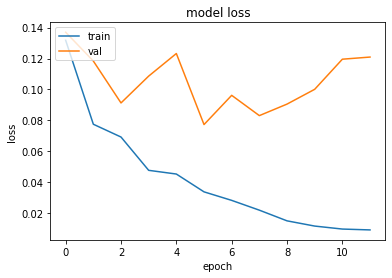

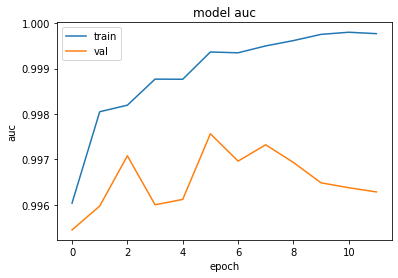

In [70]:
Charts(history,Y='auc')

In [ ]:
loss, accuracy = model.evaluate(X_val,y_val)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

### Second CNN

In [19]:
model = keras.models.Sequential([
keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = (28,28,1)),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation ='softmax')])

In [20]:
model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [21]:
model.fit(X_train,y_train, epochs=20, validation_data=(validation_data), callbacks=callback)
#save model
#early stopping

Epoch 1/20
1050/1050 [==============================] - 10s 8ms/step - loss: 0.1430 - auc: 0.9975 - val_loss: 0.0537 - val_auc: 0.9994
Epoch 2/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0488 - auc: 0.9992 - val_loss: 0.0422 - val_auc: 0.9992
Epoch 3/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0352 - auc: 0.9995 - val_loss: 0.0311 - val_auc: 0.9996
Epoch 4/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0271 - auc: 0.9996 - val_loss: 0.0402 - val_auc: 0.9994
Epoch 5/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0211 - auc: 0.9998 - val_loss: 0.0470 - val_auc: 0.9989
Epoch 6/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0163 - auc: 0.9998 - val_loss: 0.0531 - val_auc: 0.9983


In [22]:
loss, accuracy = model.evaluate(X_val,y_val)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

263/263 [==============================] - 1s 4ms/step - loss: 0.0311 - auc: 0.9996
Loss:  0.031132783740758896
Accuracy:  0.9995538592338562


## Best Model

In [43]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [28,28,1]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),



keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(10, activation ='softmax')])



In [44]:
model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])

In [45]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5",
                                                    save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=6,restore_best_weights=True)

In [46]:
model.fit(X_train,y_train, epochs=40, validation_data=validation_data, callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler])
#save model
#early stopping

Epoch 1/40
1050/1050 [==============================] - 11s 9ms/step - loss: 0.6823 - auc: 0.9707 - val_loss: 0.4755 - val_auc: 0.9816 - lr: 0.0100
Epoch 2/40
1050/1050 [==============================] - 9s 8ms/step - loss: 0.2067 - auc: 0.9942 - val_loss: 0.1481 - val_auc: 0.9950 - lr: 0.0089
Epoch 3/40
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1586 - auc: 0.9952 - val_loss: 0.1384 - val_auc: 0.9952 - lr: 0.0079
Epoch 4/40
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1295 - auc: 0.9961 - val_loss: 0.1303 - val_auc: 0.9958 - lr: 0.0071
Epoch 5/40
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1074 - auc: 0.9970 - val_loss: 0.0974 - val_auc: 0.9962 - lr: 0.0063
Epoch 6/40
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0892 - auc: 0.9975 - val_loss: 0.0704 - val_auc: 0.9972 - lr: 0.0056
Epoch 7/40
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0773 - auc: 0.9977 - val_loss: 0.0782

## Submission

In [77]:
df_test=pd.read_csv('test.csv')
df_test=df_test/255

df_test=df_test.values.reshape(-1,28,28)

y_pred=model.predict(df_test)

875/875 [==============================] - 1s 2ms/step


In [78]:
y_pred=pd.DataFrame(np.argmax(y_pred,axis=1),columns=['Label'])
submission = pd.read_csv("sample_submission.csv")
submission["Label"] = y_pred
submission.to_csv('submission.csv', index=False)

In [79]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m ""

Successfully submitted to Digit Recognizer



  0%|          | 0.00/235k [00:00<?, ?B/s]
  3%|▎         | 8.00k/235k [00:00<00:03, 73.2kB/s]
 88%|████████▊ | 208k/235k [00:00<00:00, 931kB/s]  
100%|██████████| 235k/235k [00:02<00:00, 112kB/s]
